In this notebook, used of machine learning classifiers Logistic Regression, Support Vector Machine and Random Forest 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import classification_report, roc_auc_score

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve

In [34]:
dataset = pd.read_csv('../data/train.csv')
dataset.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [35]:
Xvar_discrete = dataset[['var24', 'var25', 'var27','var40', 
                         'var44','var45','var46','var47',
                         'var48','var49','var50','var51', 
                         'var52','var53','var54']]

yvar_discrete = dataset['y']

Estimate mutual information for a discrete target variable

In [36]:
mutual_info_score = mutual_info_classif(Xvar_discrete,yvar_discrete, discrete_features=True)
print('Mutual Info Classif:\n', mutual_info_score)

Mutual Info Classif:
 [1.14474221e-02 4.93772243e-03 2.93351414e-03 2.10632625e-03
 3.47359363e-07 6.99501909e-04 5.35415306e-04 1.90301272e-04
 4.19367421e-04 7.24623227e-05 4.82053012e-03 6.28579058e-04
 1.13615286e-02 1.16886181e-02 1.65076559e-02]


In [37]:
sorted(zip(Xvar_discrete.columns, mutual_info_score))

[('var24', 0.0114474221377149),
 ('var25', 0.004937722433017641),
 ('var27', 0.002933514135031845),
 ('var40', 0.002106326254686662),
 ('var44', 3.4735936287055846e-07),
 ('var45', 0.0006995019090175218),
 ('var46', 0.0005354153064831324),
 ('var47', 0.00019030127230943263),
 ('var48', 0.0004193674212723045),
 ('var49', 7.246232269988995e-05),
 ('var50', 0.004820530115811829),
 ('var51', 0.0006285790578521161),
 ('var52', 0.01136152860532336),
 ('var53', 0.011688618107500291),
 ('var54', 0.01650765592247189)]

In [38]:
dataset['y'].replace(to_replace=[1, 0], value=['contracted', 'not_contracted'], inplace=True)

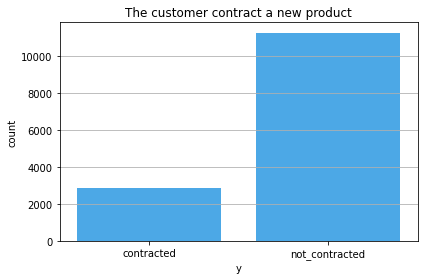

In [39]:
sns.countplot(x='y',data=dataset, color="#33adff")
plt.grid(True, axis='y')
plt.title("The customer contract a new product")
plt.tight_layout()
plt.show()

In [40]:
dataset['y'].replace(to_replace=['contracted', 'not_contracted'], value=[1, 0], inplace=True)

In [41]:
#Define X and y
features = ['var22','var24','var25','var27','var40',
            'var44','var45','var47','var49','var50',
            'var51','var52','var53','var54','var63',
            'var64','var65','var66','var67','var68']
X = dataset[features]
y = dataset.y

### Class imbalance is a common problem in the field of classification

Imbalanced logistic regression

The class imbalance problem are penalizing and weighting the likelihood, but these two parameters not sufficient
for handling the class imbalance problem

Object to over-sample the minority classes by picking samples at random with replacement. 
The bootstrap can be generated in a smoothed manner.

In [42]:
sm = SMOTE(random_state=1234)

In [43]:
X, y = sm.fit_resample(X, y)

In [44]:
y.value_counts()

1    11273
0    11273
Name: y, dtype: int64

In [45]:
#Stratified K-Folds Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
skf.get_n_splits(X, y)

5

In [46]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

TRAIN: [    0     1     2 ... 22542 22543 22545] TEST: [    6     7     8 ... 22526 22540 22544]
TRAIN: [    3     5     6 ... 22540 22544 22545] TEST: [    0     1     2 ... 22541 22542 22543]
TRAIN: [    0     1     2 ... 22542 22543 22544] TEST: [    3    18    19 ... 22532 22535 22545]
TRAIN: [    0     1     2 ... 22543 22544 22545] TEST: [    5     9    25 ... 22536 22537 22539]
TRAIN: [    0     1     2 ... 22543 22544 22545] TEST: [   10    23    24 ... 22523 22530 22531]


In [47]:
reg = 0.01
logistic_regression_model01 = LogisticRegression(C=1/reg, n_jobs=-1, solver='newton-cg').fit(X_train, y_train)
print (logistic_regression_model01)

LogisticRegression(C=100.0, n_jobs=-1, solver='newton-cg')


In [48]:
y_pred = logistic_regression_model01.predict(X_test)

In [49]:
print('Predicted labels: ', y_pred[0:10])
print('Actual labels:\n',y_test[0:10])

Predicted labels:  [1 1 1 0 1 0 1 1 1 0]
Actual labels:
 10    0
23    1
24    0
31    0
34    0
35    0
38    0
45    0
49    1
57    1
Name: y, dtype: int64


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2255
           1       0.69      0.66      0.67      2254

    accuracy                           0.68      4509
   macro avg       0.68      0.68      0.68      4509
weighted avg       0.68      0.68      0.68      4509



In [51]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [52]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_train_scaler.head()

,var22,var24,var25,var27,var40,var44,var45,var47,var49,var50,var51,var52,var53,var54,var63,var64,var65,var66,var67,var68
0,-1.405902,-0.957204,1.426272,-0.692659,0.624351,0.447199,4.398770,4.105161,-0.671716,-0.329346,-0.197327,0.363521,-0.826383,-0.653887,-0.741107,-0.280609,2.496863,2.497008,0.224329,0.039433
1,0.879758,1.236303,-0.724464,1.443711,0.201458,-2.236142,-0.302966,-0.165750,-0.671716,-0.329346,-0.197327,0.286817,-0.826383,-0.653887,-0.083832,-0.559790,-0.400479,-0.400479,0.224398,0.038585
2,0.879758,1.236303,-0.724464,-0.692659,-0.644327,0.447199,-0.302966,-0.165750,-0.671716,-0.329346,-0.197327,0.258924,-0.826383,-0.653887,0.878607,-0.605693,-0.400479,-0.400479,0.225500,0.042070
3,-1.977317,-0.957204,-1.441375,1.443711,0.835798,0.447199,0.872468,-0.165750,1.488724,-0.329346,-0.197327,0.342602,-0.826383,-0.653887,0.742457,-0.302432,2.497182,2.496996,0.224398,0.039244
4,-0.834487,1.236303,-0.724464,1.443711,-0.221434,0.447199,-0.302966,-0.165750,1.488724,-0.329346,-0.197327,0.283330,-0.826383,-0.653887,0.531190,-0.476262,-0.400479,-0.400479,0.225845,0.039244


In [53]:
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)
X_test_scaler.tail()

,var22,var24,var25,var27,var40,var44,var45,var47,var49,var50,var51,var52,var53,var54,var63,var64,var65,var66,var67,var68
4504,0.879758,-0.957204,-0.724464,-0.692659,-1.278666,-2.236142,-0.302966,-0.16575,-0.671716,-0.329346,-0.197327,0.265897,-0.826383,-0.653887,-3.676136,-0.992051,-0.400479,-0.400479,0.224261,0.040097
4505,-0.263072,-0.957204,-1.441375,-0.692659,-0.009988,0.447199,-0.302966,-0.16575,1.488724,-0.329346,-0.197327,0.255438,-0.826383,-0.653887,0.437537,-0.110045,-0.400479,-0.400479,0.223974,0.042839
4506,0.879758,1.236303,-0.724464,1.443711,-0.855774,0.447199,-0.302966,-0.16575,-0.671716,-0.329346,-0.197327,0.231032,0.585521,0.824819,-3.137557,-0.208059,-0.400479,-0.400479,0.224849,0.036901
4507,0.308343,-0.957204,-0.724464,-0.692659,0.201458,-2.236142,-0.302966,-0.16575,-0.671716,-0.329346,-0.197327,0.297276,-0.826383,-0.653887,0.664590,0.032788,-0.400479,-0.400479,0.225527,0.040482
4508,-0.263072,1.236303,-1.441375,-0.692659,-0.855774,0.447199,-0.302966,-0.16575,-0.671716,-0.329346,-0.197327,0.283330,-0.826383,-0.653887,0.402270,0.031082,-0.400479,-0.400479,-4.456291,0.040840


In [54]:
logistic_regression_model02 = LogisticRegression(C=1/reg, n_jobs=-1).fit(X_train_scaler, y_train)
print (logistic_regression_model02)

LogisticRegression(C=100.0, n_jobs=-1)


In [55]:
predictions = logistic_regression_model02.predict(X_test_scaler)
print('Predicted labels: ', predictions[0:10])
print('Actual labels:\n',y_test[0:10])

Predicted labels:  [1 1 1 0 1 0 1 1 1 0]
Actual labels:
 10    0
23    1
24    0
31    0
34    0
35    0
38    0
45    0
49    1
57    1
Name: y, dtype: int64


In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2255
           1       0.69      0.66      0.67      2254

    accuracy                           0.68      4509
   macro avg       0.68      0.68      0.68      4509
weighted avg       0.68      0.68      0.68      4509



In [57]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[1588,  667],
       [ 775, 1479]])

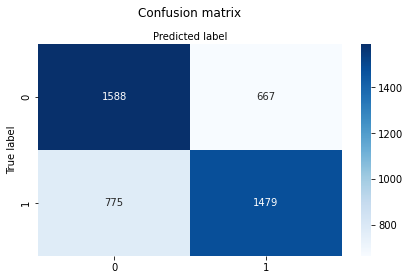

In [58]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [59]:
y_scores = logistic_regression_model02.predict_proba(X_test_scaler)
print(y_scores)

[[0.47145357 0.52854643]
 [0.1319766  0.8680234 ]
 [0.34909969 0.65090031]
 ...
 [0.75359265 0.24640735]
 [0.1132764  0.8867236 ]
 [0.21914158 0.78085842]]


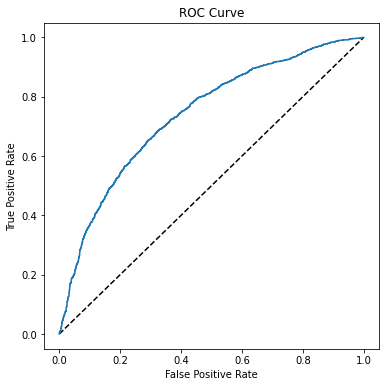

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0.0, 1.0], [0.0, 1.0], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7386562838767051


Well-Calibrated Probabilities

The classfication model is used to predict the probability of customer contract a new product.
It is desirable that the estimated class probabilities are reflective of the true underlying probability of 
the sample.

That is, the predicted class probability needs to be well-calibrated.To be well-calibrated, the probabilities must effectively reflect the true likelihood of the event of interest.

In [62]:
# Creating classifiers
logistic_regression_model04 = LogisticRegression(C=1/reg, n_jobs=-1,solver='newton-cg')
svm_model = svm.SVC(C=1.0,probability=True)
rfc_model = RandomForestClassifier()

models_list= [
    (logistic_regression_model04, "Logistic"),
    (svm_model, "SVC"),
    (rfc_model, "Random forest")
]

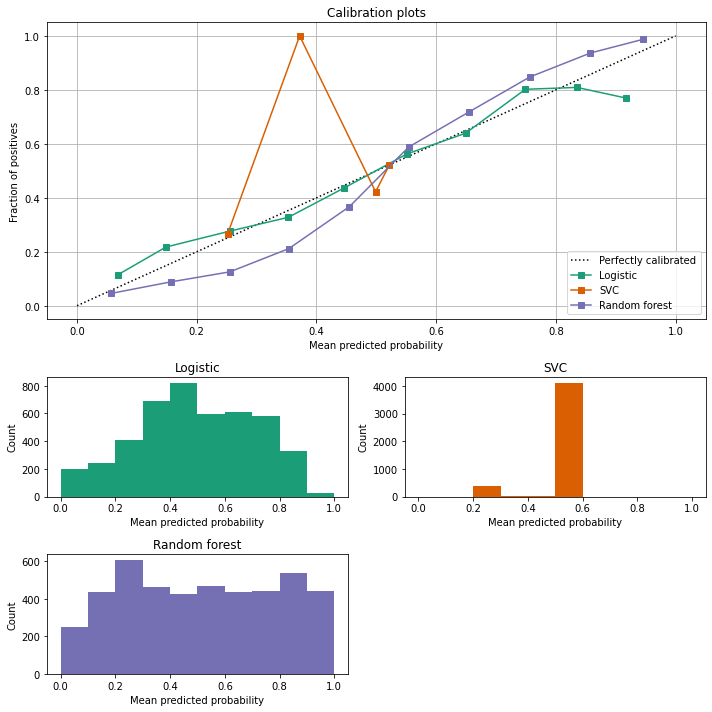

In [63]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(models_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0)]
for i, (_, name) in enumerate(models_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

References

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html

https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
